# A multinomial classification problem using Logistic Regression 


In [1]:
# Importing all dependencies 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# This command downloads MNIST dataset from sklearn
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
# Independent array shape
X.shape

(70000, 784)

In [4]:
# Dependent array shape  
y.shape

(70000,)

In [5]:
# Independent element shape (it's 28x28 but flattened out)
X[0].shape

(784,)

In [6]:
# Sample independent variable 
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
# Sample dependent variable 
y[0]

'5'

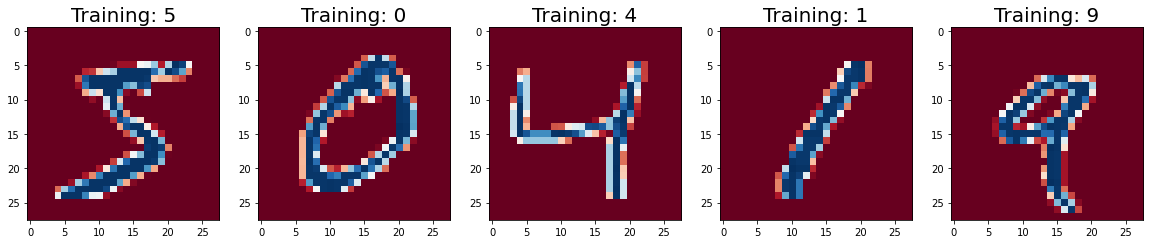

In [8]:
# Plotting some samples 
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.RdBu)
  plt.title(f'Training: {label}', fontsize = 20)

In [9]:
# Splitting data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [10]:
# Using standard scaler to normalize the data 
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [11]:
# Initializing Logistic Regression object
log_reg = LogisticRegression(n_jobs=-1)

In [12]:
# Fitting log_reg on training dataset 
t0 = time.time()
log_reg.fit(X_train, y_train)
print(f"Time to train the model: {time.time() - t0} secs")

Time to train the model: 42.53439998626709 secs


In [13]:
# Calculating accuracy score on test dataset 
score = log_reg.score(X_test, y_test) # accuracy 
print(f"Accuracy on test dataset: {score*100} %")

Accuracy on test dataset: 91.5 %


In [14]:
# This is how we need to pass a single variable for prediction 
log_reg.predict(X_test[0].reshape(1,-1))

array(['8'], dtype=object)

In [15]:
# Getting predictions on test data (we will use this to calculate confusion matrix)
preds = log_reg.predict(X_test)

In [16]:
# Calculating confusion matrix 
cm = confusion_matrix(y_test, preds)

In [17]:
# Printing confusion matrix 
print(cm)

[[1285    1   10    0    1   13   21    4    6    2]
 [   0 1552    6    9    3    7    0    4   16    3]
 [   6   18 1234   20   12   13   22   16   29   10]
 [   5   11   40 1266    1   42    7   21   20   20]
 [   5    3    8    4 1189    5   13    9    9   50]
 [  10   10    7   43   12 1113   21    3   39   15]
 [   5    5   21    1   17   21 1318    3    5    0]
 [   5    4   23    6   13    6    0 1412    0   34]
 [  10   32   15   46    7   43   13    9 1161   21]
 [   7   10    5   13   38    5    0   47   15 1280]]


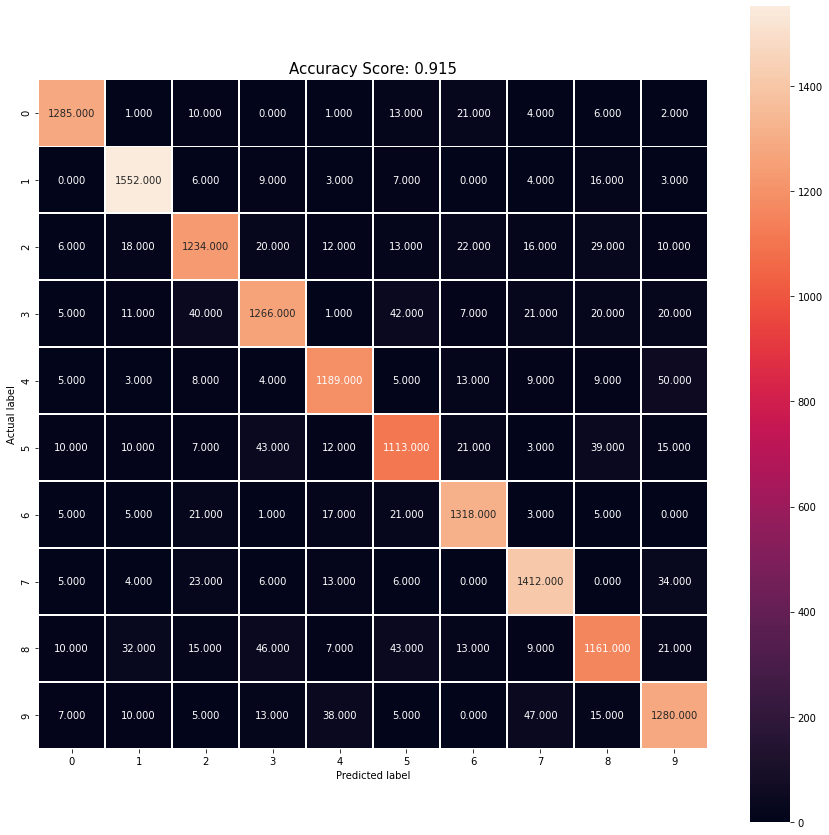

In [18]:
# Plotting confusion matrix 
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [19]:
# Calculating indices for misclassified images 
index = 0
misclassifiedIndices = []
for label, predict in zip(y_test, preds):
  if label != predict: 
    misclassifiedIndices.append(index)
  index +=1

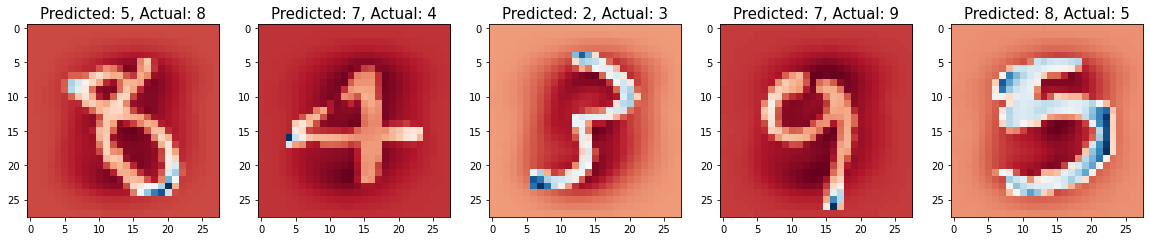

In [21]:
# Plotting misclassified images 
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndices[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.RdBu)
 plt.title(f'Predicted: {preds[badIndex]}, Actual: {y_test[badIndex]}', fontsize = 15)